<a href="https://colab.research.google.com/github/angyf/Proyecto_Final/blob/main/modelos_finales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar librerias y funciones

In [1]:
# importamos librerias que nos seran de utilidad 
! pip install plotly
!pip install PyDrive

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from keras.models import model_from_json
from sklearn import tree as treeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
# Funciones para obtener eficiencia de nuestros modelos
def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

# Datos

In [3]:
#Cargamos nuestro dataset

url='https://drive.google.com/file/d/1lLgbJDE7Ybb4x_4WpVcmdwxdvVJv_9A7/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path,index_col=0)

# separamos nuestros datos en la variable a predecir y y las variables independientes que resultaron significativas para los modelos a crear
y=df.enfermedad_cardiaca
X=df.drop(['enfermedad_cardiaca','imc','sexo','presion_diastolica'],axis=1)

# separar en datos de prueba y entrenamiento
X_train_full,X_valid_full, y_train, y_valid=train_test_split(X,y,test_size=0.3,random_state=15)

# Seleccionar variables numericas 
numerical_cols=[name for name in X_train_full.columns if X_train_full[name].dtype in ["int64","float64"]]

# seleccionar las columnas que queremos
X_train =X_train_full[numerical_cols].copy()
X_valid=X_valid_full[numerical_cols].copy()


In [4]:
#Preprocesar las variables numericas
numerical_transformer= SimpleImputer(strategy="most_frequent")

#Juntar las variables preprocesadas
preprocessor= ColumnTransformer(
    transformers=[("num",numerical_transformer,numerical_cols)])


Lo que se busca a continuación es crear distintos modelos con el fin de obtener el que realice una mejor clasificación sobre si la persona desarrollara o no una enfermedad cardiaca de acuerdo con ciertas caracteristicas.

Se realizo la creación de 4 modelos,:

* Red neuronal

* Regresión logistica

* Árboles de decisión

* Bosque aleatorios

# REDES NEURONALES

In [5]:
# Definamos nuestra red neuronal con Keras
red_neuronal = Sequential()
#Agregamos capas, imput_dim es el numero de inputs que recibe cada capa, solo se
#le agrega a la primera pues conocemos el numero de variables con las que iniciamos 
red_neuronal.add(Dense(17, input_dim=9, activation="relu"))
red_neuronal.add(Dense(5, activation="relu"))
red_neuronal.add(Dense(14, activation="relu"))
red_neuronal.add(Dense(3, activation="relu"))
red_neuronal.add(Dense(9, activation="relu"))
#La ultima función de activación es sigmoide debido a que el resultado esperado es
#una variable binaria
red_neuronal.add(Dense(1, activation="sigmoid"))
# Compilar
red_neuronal.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
#Entrenamos el modelo
red_neuronal.fit(X_train,y_train, epochs=150, batch_size= 28)

Epoch 1/150
1527/1527 [==============================] - 16s 2ms/step - loss: 0.6419 - accuracy: 0.6673
Epoch 2/150
1527/1527 [==============================] - 3s 2ms/step - loss: 0.6017 - accuracy: 0.6930
Epoch 3/150
1527/1527 [==============================] - 3s 2ms/step - loss: 0.5969 - accuracy: 0.6921
Epoch 4/150
1527/1527 [==============================] - 3s 2ms/step - loss: 0.5899 - accuracy: 0.7002
Epoch 5/150
1527/1527 [==============================] - 3s 2ms/step - loss: 0.5859 - accuracy: 0.7009
Epoch 6/150
1527/1527 [==============================] - 3s 2ms/step - loss: 0.5813 - accuracy: 0.7055
Epoch 7/150
1527/1527 [==============================] - 3s 2ms/step - loss: 0.5848 - accuracy: 0.6967
Epoch 8/150
1527/1527 [==============================] - 3s 2ms/step - loss: 0.5804 - accuracy: 0.7033
Epoch 9/150
1527/1527 [==============================] - 3s 2ms/step - loss: 0.5793 - accuracy: 0.7058
Epoch 10/150
1527/1527 [==============================] - 3s 2ms/step - 

In [6]:
#prediccion sobre la red
y_predict = red_neuronal.predict_classes(X_valid)

# Métricas del modelo
resultado = confusion_matrix(y_valid, y_predict)
(TN, FP, FN, TP) = resultado.ravel()
 
acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print("Precision:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

# Guardar el modelo entrenado
model_json = red_neuronal.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
#serializar los pesos a HDF5
red_neuronal.save_weights("model.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Precision:72.41416953223077%
Sensibilidad:66.57706093189965%
Especificidad:77.96231236026829%


**Experimento 0**
- Capas 9
- Neuronas por capa 10,15,8,4,9,11,5,2,1
- Epochs 68
- Batch 45
- Precision 51.26% 
- Sensibilidad 0%
- Especificidad 100%



**Experimento 1**
- Capas  6
- Neuronas por capa 10,15,8,13,5,1
- Epochs 130
- Batch 28
- Precision 71.69%
- Sensibilidad 75.33%
- Especificidad 68.24%


**Experimento 2**
- Capas 4
- Neuronas por capa 10,15,8,1
- Epochs 130
- Batch 28
- Precision 72.10%
- Sensibilidad 64.15%
- Especificidad 79.64%


**Experimento 3**
- Capas 9
- Neuronas por capa 20,13,7,15,2,9,5,7,1
- Epochs 120
- Batch 25
- Precision 72.15
- Sensibilidad 66.53
- Especificidad 77.50


**Experimento 4**
- Capas 12
- Neuronas por capa 30,18,20,13,5,17,6,3,16,20,5,1 
- Epochs 130
- Batch 15
- Precision 72.23 
- Sensibilidad 66.55
- Especificidad 77.63


**Experimento 5**
- Capas 5
- Neuronas por capa 17,5,9,15,1 
- Epochs 130
- Batch 35
- Precision 71.73
- Sensibilidad 61.02
- Especificidad 81.91

**Experimento 6**
- Capas 6
- Neuronas por capa 17,5,14,3,9,1 
- Epochs 130
- Batch 28
- Precision  71.97
- Sensibilidad  64.79
- Especificidad 78.80

**Experimento 7**
- Capas 7
- Neuronas por capa 4,13,7,19,5,8,1 
- Epochs 130
- Batch 35
- Precision 72.16
- Sensibilidad 66.71
- Especificidad 77.34

**Experimento 8**
- Capas 6
- Neuronas por capa 17,5,14,3,9,1 
- Epochs 150
- Batch 28
- Precision 72.27
- Sensibilidad 73.01
- Especificidad 71.57

**Experimento 9**
- Capas 6
- Neuronas por capa 7,73,14,6,11,1 
- Epochs 130
- Batch 28
- Precision 72.26 
- Sensibilidad 69.18
- Especificidad 75.19

**Experimento 10**
- Capas 5
- Neuronas por capa 2,5,9,3,1
- Epochs 130
- Batch 50
- Precision 69.76
- Sensibilidad 69.10
- Especificidad 70.39

**Experimento 11**
- Capas 6
- Neuronas por capa 27,14,6,19,5,1 
- Epochs 130
- Batch 28
- Precision 72.42
- Sensibilidad 67.32
- Especificidad 77.27

**Experimento 12**
- Capas 8
- Neuronas por capa 40,35,17,9,4,12,3,1 
- Epochs 300
- Batch 50
- Precision 72.09 
- Sensibilidad  59.89
- Especificidad 83.70

**Experimento 13**
tarda mucho en entrenarse
- Capas 6
- Neuronas por capa 10,15,8,13,5,1 
- Epochs 300
- Batch 5
- Precision 72.13%
- Sensibilidad 66.82%
- Especificidad 77.185

**Experimento 14**
- Capas 6
- Neuronas por capa 13,18,5,9,3,1
- Epochs 500
- Batch 15
- Precision  72.14%
- Sensibilidad 63.39%
- Especificidad 80.45%

**Experimento 15**
- Capas 6
- Neuronas por capa 23,18,9,15,3,1
- Epochs 300
- Batch 25
- Precision 71.78%
- Sensibilidad 58.19%
- Especificidad 84.70%

**Experimento 16**
- Capas 6
- Neuronas por capa 10,15,8,13,5,1
- Epochs 150
- Batch 28
- Precision 71.75%
- Sensibilidad 60.56%
- Especificidad 82.40%


**Experimento 17**
- Capas 6
- Neuronas por capa 13,18,5,9,3,1 
- Epochs 250
- Batch 28
- Precision 71.32
- Sensibilidad 75.31
- Especificidad 67.53


**Experimento 18**
- Capas 6
- Neuronas por capa 13,18,9,15,3,1 
- Epochs 150 
- Batch 25
- Precision 72.17
- Sensibilidad 63.97
- Especificidad 79.96

**Experimento 19**

- Capas 6
- Neuronas por capa 13,18,5,9,3,1 
- Epochs 130
- Batch 28
- Precision 72.32
- Sensibilidad 68.49
- Especificidad 75.97

**Experimento 20**

- Capas 6
- Neuronas por capa 10,15,8,13,5,1
- Epochs 250
- Batch 28
- Precision 72.275
- Sensibilidad 66.25%
- Especificidad 78.00%

Hasta ahora se ha elegido el modelo 8 que cuenta con métricas que se consideraron adecuadas para el tipo de problema que se esta trabajando, por lo que se realiza su carga para poder replicar su precisión, especificidad  y sensibilidad.


In [7]:
# Damos los permisos para almacenar los archivos de manera temporal 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# importamos los archivos de Drive del modelo entrenado previamente elegido.
downloaded = drive.CreateFile({'id':"1d-yNqWirMTsMA-VHHgDmmWQzMkEvCdLZ"})   # replace the id with id of file you want to access
downloaded.GetContentFile('model.json') 
downloaded = drive.CreateFile({'id':"1J6pDWA31mwqAKZ6Q7UHQKq0IJNeJqN9A"})   # replace the id with id of file you want to access
downloaded.GetContentFile('model.h5') 


In [8]:
# cargar la información para el modelo elegido
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# cargar pesos al nuevo modelo
loaded_model.load_weights("model.h5")
print("Modelo cargado.")
 
# Compilar modelo cargado y listo para usar.
loaded_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Modelo cargado.


In [9]:
#prediccion del modelo cargado
y_predict = loaded_model.predict_classes(X_valid)

# Resultados (métricas de l modelo)
resultado = confusion_matrix(y_valid, y_predict)
(TN, FP, FN, TP) = resultado.ravel()
 
acc_red = calcularAccuracy(TP, TN, FP, FN)
sen_red = calcularSensibilidad(TP, TN, FP, FN)
spec_red = calcularEspecificidad(TP, TN, FP, FN)
print("Precision:"+str(acc_red)+"%")
print("Sensibilidad:"+str(sen_red)+"%")
print("Especificidad:"+str(spec_red)+"%")

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Precision:72.2777140985754%
Sensibilidad:73.01747311827957%
Especificidad:71.57457681251996%


# Regresión logistica

In [10]:
# definimos el modelo
reg= LogisticRegression(max_iter=45000,random_state=23)
#conjuntar los datos preprocesados
pipeReg=Pipeline(steps=[("preprocessor",preprocessor),
                            ("model",reg)])
#Embonar el training
pipeReg.fit(X_train,y_train)
# Predicción
preds= pipeReg.predict(X_valid)

In [11]:

# Resultados (métricas de l modelo)
resultado = confusion_matrix(y_valid, preds)
(TN, FP, FN, TP) = resultado.ravel()
 
acc_rl = calcularAccuracy(TP, TN, FP, FN)
sen_rl = calcularSensibilidad(TP, TN, FP, FN)
spec_rl = calcularEspecificidad(TP, TN, FP, FN)
print("Precision:"+str(acc_rl)+"%")
print("Sensibilidad:"+str(sen_rl)+"%")
print("Especificidad:"+str(spec_rl)+"%")

Precision:71.91747175372524%
Sensibilidad:64.16890681003584%
Especificidad:79.2824443734696%


# Árboles de Decisión

In [12]:
arbol = treeClassifier.DecisionTreeClassifier(random_state=83)
arbol = arbol.fit(X_train, y_train)

#plt.figure(figsize = (10,10), dpi = 300)
#treeClassifier.plot_tree(arbol,filled = True);
#plt.show()

In [13]:
y_pred = arbol.predict(X_valid)

enfermedad = np.array(y_valid)
predictions = np.array(y_pred)
confusion_matrix(enfermedad, predictions)

array([[6202, 3191],
       [3539, 5389]])

In [14]:
resultado = confusion_matrix(enfermedad, predictions)

(TN, FP, FN, TP) = resultado.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN)+"\n")
 
acc_ar = calcularAccuracy(TP, TN, FP, FN)
sen_ar = calcularSensibilidad(TP, TN, FP, FN)
spec_ar = calcularEspecificidad(TP, TN, FP, FN)
print("Precision:"+str(acc_ar)+"%")
print("Sensibilidad:"+str(sen_ar)+"%")
print("Especificidad:"+str(spec_ar)+"%")

True positives: 5389
True negatives: 6202
False positives: 3191
False negative: 3539

Precision:63.26619725997489%
Sensibilidad:60.36066308243727%
Especificidad:66.02789311189183%


In [15]:
score= mean_absolute_error(y_valid,predictions)
print("MAE:  ",score,"\n\n")

MAE:   0.36733802740025107 




# Random Forest

In [16]:
bosque = RandomForestRegressor(n_estimators=80, random_state=1)
bosque.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [17]:
preds= bosque.predict(X_valid)

In [18]:
score= mean_absolute_error(y_valid,preds)
print("MAE:  ",score,"\n\n")

MAE:   0.37569073890913635 




# COMPARACIÓN DE MODELOS

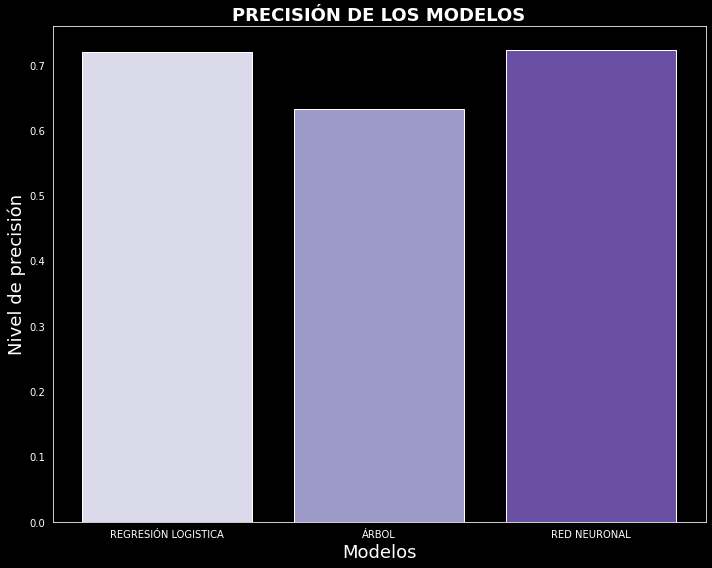

In [22]:
#COMPARAMOS LA PRECISION DE NUESTROS MODELOS A TRAVÉS DE UN GRÁFICO

# Creamos la lista de los modelos
models = [reg,arbol]

# inicia variables vacía para el loop
train_accuracy = []
test_accuracy = []

# Genera el calulo de tu medida a elegir

for i in models:
    y_pred_test = i.predict(X_valid)
    accuracy_test = accuracy_score(y_valid,y_pred_test)
    test_accuracy.append(accuracy_test)

# Debido a que la predicción de la red se realiza con ayuda de la función predict_classes
# se agrega la precisión de manera individual

test_accuracy.append(acc_red/100)

#Definimos un estilo oscuro para nuestros gráficos
sns.set_style("dark")
plt.style.use("dark_background")

# Grafica el accuracy
colors=sns.color_palette("Purples",3)
plt.figure(figsize=(10,8))
plt.bar([ 'REGRESIÓN LOGISTICA', 'ÁRBOL','RED NEURONAL'], test_accuracy,color=colors)
plt.title('PRECISIÓN DE LOS MODELOS', fontsize=18, color='w', weight='bold')
plt.xlabel('Modelos', fontsize=18, color='w')
plt.ylabel('Nivel de precisión', fontsize=18, color='w')
plt.tight_layout()
plt.show()

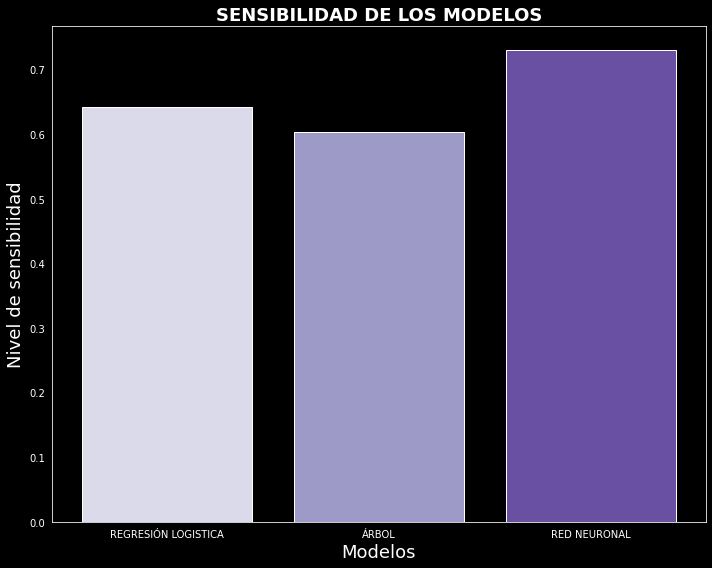

In [23]:
#COMPARAMOS LA SENSIBILIDAD DE NUESTROS MODELOS A TRAVÉS DE UN GRÁFICO

sensibilidad=[sen_rl/100,sen_ar/100,sen_red/100]

# Grafica sensibilidad
colors=sns.color_palette("Purples",3)
plt.figure(figsize=(10,8))
plt.bar([ 'REGRESIÓN LOGISTICA', 'ÁRBOL','RED NEURONAL'], sensibilidad,color=colors)
plt.title('SENSIBILIDAD DE LOS MODELOS', fontsize=18, color='w', weight='bold')
plt.xlabel('Modelos', fontsize=18, color='w')
plt.ylabel('Nivel de sensibilidad', fontsize=18, color='w')
plt.tight_layout()
plt.show()

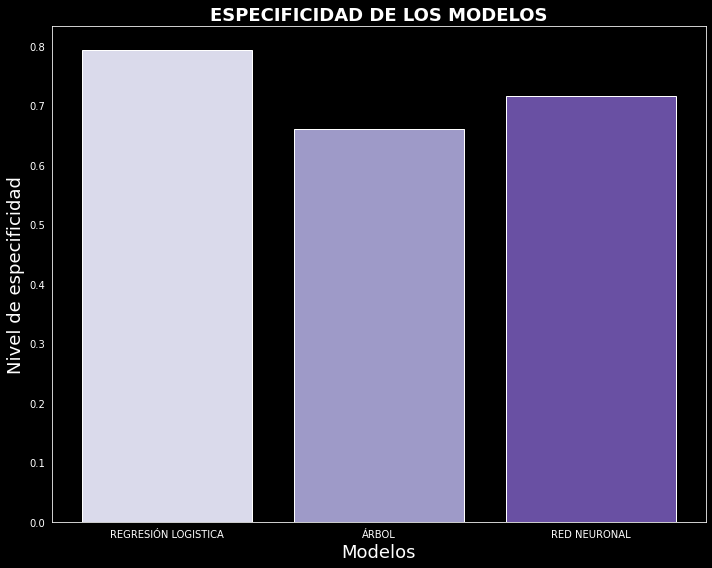

In [24]:
#COMPARAMOS LA ESPECIFICIDAD DE NUESTROS MODELOS A TRAVÉS DE UN GRÁFICO

especificidad=[spec_rl/100,spec_ar/100,spec_red/100]

# Grafica sensibilidad
colors=sns.color_palette("Purples",3)
plt.figure(figsize=(10,8))
plt.bar([ 'REGRESIÓN LOGISTICA', 'ÁRBOL','RED NEURONAL'], especificidad,color=colors)
plt.title('ESPECIFICIDAD DE LOS MODELOS', fontsize=18, color='w', weight='bold')
plt.xlabel('Modelos', fontsize=18, color='w')
plt.ylabel('Nivel de especificidad', fontsize=18, color='w')
plt.tight_layout()
plt.show()